<a href="https://colab.research.google.com/github/dhevintaaa/Superstore_Sales_Analysis/blob/main/Portfolio1_Sales_Supersore_Dhevinta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superstore Sales Dataset - Sample

## About Dataset

Superstore is a fictional retail company based in the United States. They specialize in selling furniture, office supplies, and technology products. This dataset containing information related to Sales, Profits and other interesting facts of a Superstore.

Source: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final/data

## Variable

- Row ID: Unique ID for each row.
- Order ID: Unique Order ID for each Customer.
- Order Date: Order Date of the product.
- Ship Date: Shipping Date of the Product.
- Ship Mode: Shipping Mode specified by the Customer.
- Customer ID: Unique ID to identify each Customer.
- Customer Name: Name of the Customer.
- Segment: The segment where the Customer belongs.
- Country: Country of residence of the Customer.
- City: City of residence of of the Customer.
- State: State of residence of the Customer.
- Postal Code: Postal Code of every Customer.
- Region: Region where the Customer belong.
- Product ID: Unique ID of the Product.
- Category: Category of the product ordered.
- Sub-Category: Sub-Category of the product ordered.
- Product Name: Name of the Product
- Sales: Sales of the Product.
- Quantity: Quantity of the Product.
- Discount: Discount provided.
- Profit: Profit/Loss incurred.

## Key Research Questions


* **Orders and Shipping**

1. What is the average shipping days per shipping mode?
2. Which shipping mode is used the most by customers?
3. Are faster shipping modes correlated with higher sales or profit?


* **Customer and Segment**

4. Which segment generates the highest sales?
5. Which segment has the highest number of customers?
6. Who are the top 5 customers by profit?
7. Which city or state has the most loyal customers based on order frequency?

* **Region and Geography**

8. Which region generates the highest and lowest sales?
9. Which country or city has the highest profit margins?

* **Product and Categories**

10. Which product category has the highest sales and profit?
11. Which sub-category contributes most to total profit?
12. Which product has the highest discount applied but lowest profit?

* **Financial Metrics**

13. How does discount affect profit across different categories?
14. Which orders had negative profit and why?
15. What is the average profit margin per category?

# Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir()

['.config', 'sample_data']

# Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Sample - Superstore.csv', encoding = "latin1")

using encoding = 'latin1' because the CSV file encoding is not compatible with the default encoding

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

I will drop some columns that unnessesary:

- Row ID
- Product ID
- Postal Code
- Country (because the country only has "United States")

In [7]:
#Delete unnessesary columns

data.drop(columns=["Row ID", 'Product ID', 'Postal Code', 'Country'],inplace=True)

In [8]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# Data Analysis

## Data Preparation

Handle the missing values and duplicate

In [10]:
#Check duplicate value

data.duplicated().sum()

np.int64(1)

In [11]:
#Drop duplicate value

data = data.drop_duplicates()

In [12]:
#Check again

data.duplicated().sum()

np.int64(0)

In [13]:
#Check missing value

data.isnull().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0
Region,0


There is no missing value.

Changing data type for columns "Order Date" and "Ship Date" from object to date time:

In [14]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce')

In [15]:
data['Order Date'].dtype

dtype('<M8[ns]')

In [16]:
data['Ship Date'].dtype

dtype('<M8[ns]')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9993 non-null   object        
 1   Order Date     9993 non-null   datetime64[ns]
 2   Ship Date      9993 non-null   datetime64[ns]
 3   Ship Mode      9993 non-null   object        
 4   Customer ID    9993 non-null   object        
 5   Customer Name  9993 non-null   object        
 6   Segment        9993 non-null   object        
 7   City           9993 non-null   object        
 8   State          9993 non-null   object        
 9   Region         9993 non-null   object        
 10  Category       9993 non-null   object        
 11  Sub-Category   9993 non-null   object        
 12  Product Name   9993 non-null   object        
 13  Sales          9993 non-null   float64       
 14  Quantity       9993 non-null   int64         
 15  Discount       9993 non-nu

In [18]:
#Save the clean data for visualization purpose

#data.to_csv("superstore_clean.csv", index=False)

In [19]:
#from google.colab import files
#files.download("superstore_clean.csv")

In [20]:
#Describe object (categorical) columns
print("\nSummary Statistics for Categorical Columns:")
display(data.describe(include='object'))


Summary Statistics for Categorical Columns:


,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name
count,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993
unique,5009,4,793,793,3,531,49,4,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,New York City,California,West,Office Supplies,Binders,Staple envelope
freq,14,5967,37,37,5191,915,2001,3203,6026,1523,48


## Features Engineering + Data Visualization

### Orders and Shipping

Add a new column: "Shipping Day" (in days) and calculate it from "Order Date" and "Shipping Date" columns and convert to days.

In [21]:
data['Shipping Days'] = (data['Ship Date'] - data['Order Date']).dt.days

In [22]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Days'],
      dtype='object')

In [23]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


In [24]:
summary = data.drop(columns=["Order Date", "Ship Date"]).describe()

In [25]:
summary

,Sales,Quantity,Discount,Profit,Shipping Days
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971,3.958171
std,623.276074,2.225149,0.206457,234.271476,1.747654
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,17.280000,2.000000,0.000000,1.731000,3.000000
50%,54.480000,3.000000,0.200000,8.671000,4.000000
75%,209.940000,5.000000,0.200000,29.364000,5.000000
max,22638.480000,14.000000,0.800000,8399.976000,7.000000


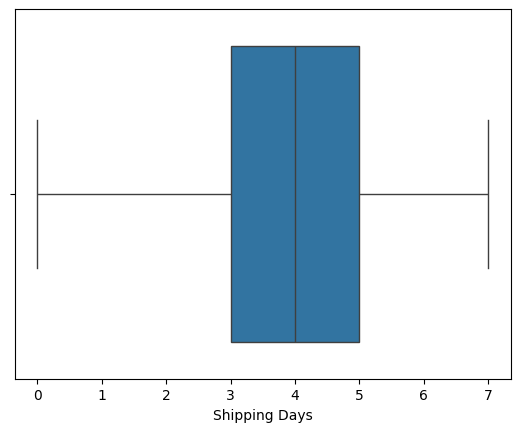

In [26]:
sns.boxplot(data = data, x = "Shipping Days")
plt.show()

The shipping day duration falls within the range of 3–5 days.

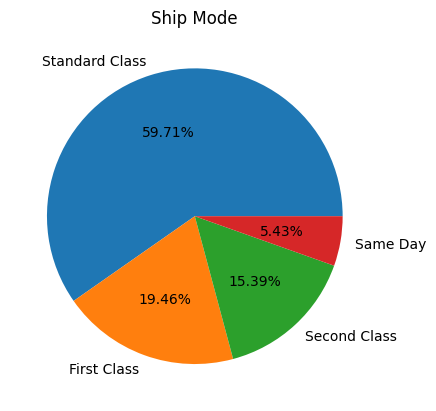

In [27]:
#Type of Shipping Mode

#sns.countplot(data = data, x = "Ship Mode")
#plt.show()

plt.pie(x = data["Ship Mode"].value_counts(),
        labels = ("Standard Class", "First Class", "Second Class", "Same Day"),
        autopct='%.2f%%'
)
plt.title("Ship Mode")
plt.show()

More than half of the customers (≥50%) choose Standard Class as their shipping mode, indicating that most customers prefer the more economical shipping option over Same Day.

In [28]:
#Group by Ship Mode and sum the sales
shipmode_sales = data.groupby("Ship Mode")["Sales"].sum().sort_values(ascending=False)

In [29]:
shipmode_sales

,Sales
Ship Mode,
Standard Class,1.357934e+06
Second Class,4.591936e+05
First Class,3.514284e+05
Same Day,1.283631e+05


In [30]:
#Group by Ship Mode and sum the profit
shipmode_profit = data.groupby("Ship Mode")["Profit"].sum().sort_values(ascending=False)

In [31]:
shipmode_profit

,Profit
Ship Mode,
Standard Class,164100.8463
Second Class,57446.6354
First Class,48969.8399
Same Day,15891.7589


No significant correlation found between faster shipping mode (Same Day) and higher sales/profit.

### Customer and Segment

In [32]:
#Type of Segment

segment = data["Segment"].value_counts()
label = ['Consumer','Corporate', 'Home Office']

In [33]:
segment

,count
Segment,
Consumer,5191
Corporate,3020
Home Office,1782


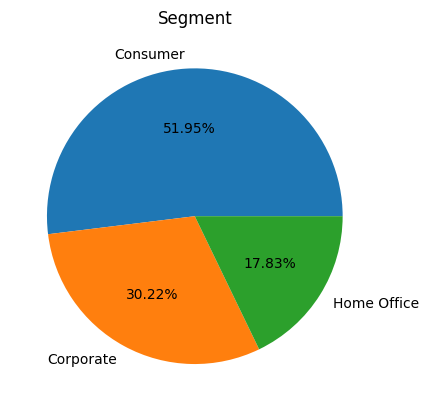

In [34]:
plt.pie(x = segment,
        labels = label,
        autopct='%.2f%%'
)
plt.title("Segment")
plt.show()

In [35]:
#Group by Segment and Customer ID
customer_count = data.groupby("Segment")["Customer ID"].nunique()

In [36]:
customer_count

,Customer ID
Segment,
Consumer,409
Corporate,236
Home Office,148


The majority of customers fall into the Consumer segment, which is 51.95% with 409 customers out of 793 customers.

In [37]:
#Group by Customer and Profit
customer_profit = data.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False)

In [38]:
customer_profit.head()

,Profit
Customer Name,
Tamara Chand,8981.3239
Raymond Buch,6976.0959
Sanjit Chand,5757.4119
Hunter Lopez,5622.4292
Adrian Barton,5444.8055


In [39]:
#Show top 5 customers by profit
customer_profit1 = data.groupby("Customer Name")["Profit"].sum().nlargest(5).reset_index()

/tmp/ipython-input-3251931339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profit", y="Customer Name",


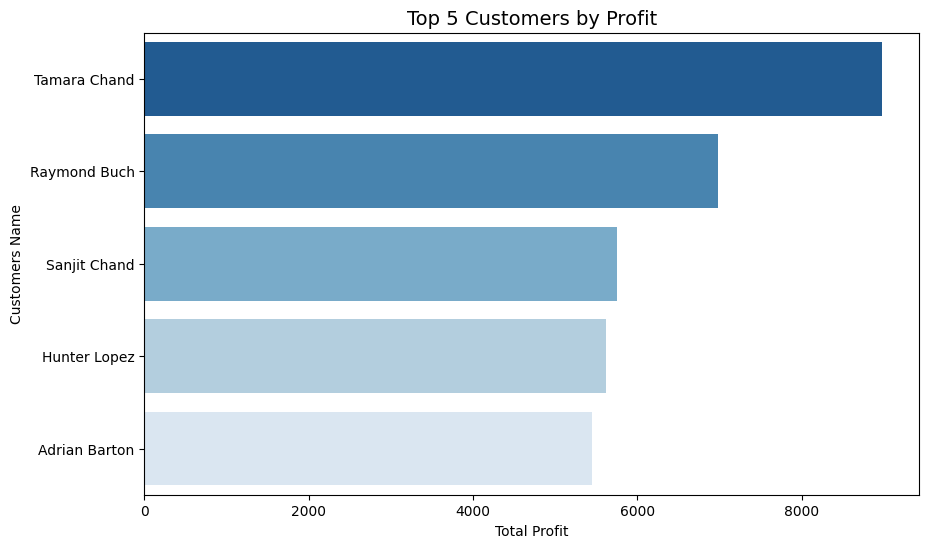

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x="Profit", y="Customer Name",
            data=customer_profit1, palette="Blues_r")

plt.title("Top 5 Customers by Profit", fontsize=14)
plt.xlabel("Total Profit")
plt.ylabel("Customers Name")
plt.show()

In [41]:
#Count number of orders per customer
customer_orders = data.groupby('Customer ID')['Order ID'].nunique().reset_index()
customer_orders.rename(columns={'Order ID': 'Order_Count'}, inplace=True)

In [42]:
customer_orders.head()

,Customer ID,Order_Count
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3


In [43]:
customer_info = data[['Customer ID', 'City', 'State']].drop_duplicates()

In [44]:
customer_info.head()

,Customer ID,City,State
0,CG-12520,Henderson,Kentucky
2,DV-13045,Los Angeles,California
3,SO-20335,Fort Lauderdale,Florida
5,BH-11710,Los Angeles,California
12,AA-10480,Concord,North Carolina


In [45]:
#Merge with order counts through Customer ID
customer_orders = customer_orders.merge(customer_info, on='Customer ID')

In [46]:
customer_orders.head()

,Customer ID,Order_Count,City,State
0,AA-10315,5,Minneapolis,Minnesota
1,AA-10315,5,San Francisco,California
2,AA-10315,5,Round Rock,Texas
3,AA-10315,5,New York City,New York
4,AA-10375,9,Mesa,Arizona


In [47]:
#Average orders per state
state_loyalty = customer_orders.groupby('State')['Order_Count'].mean().sort_values(ascending=False)
print(state_loyalty.head(10))

State
Idaho             9.363636
Maine             9.000000
West Virginia     8.500000
South Carolina    8.300000
Oregon            8.089286
Nebraska          8.086957
Vermont           7.800000
Maryland          7.673913
Arkansas          7.666667
New Hampshire     7.647059
Name: Order_Count, dtype: float64


Based on average order frequency per state, customers from Idaho are the most loyal, placing an average of 9.37 orders per customer, which is higher than any other states. This indicates a strong repeat-purchase behavior in this area, which could be targeted for loyalty programs or promotions.

### Region and Geography

In [48]:
#Check Region

data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [49]:
#Group by Region and Sale
region_sales = data.groupby("Region")["Sales"].sum().sort_values(ascending=False).reset_index()

In [50]:
region_sales

,Region,Sales
0,West,725457.8245
1,East,678499.8680
2,Central,501239.8908
3,South,391721.9050


/tmp/ipython-input-4209326495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Sales",


Text(0.5, 0, 'Region')

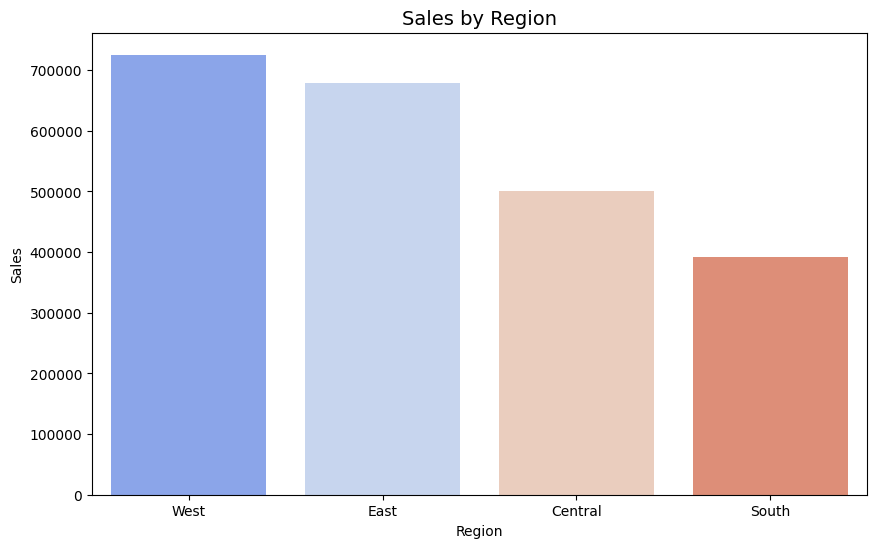

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x="Region", y="Sales",
            data=region_sales, palette="coolwarm")

plt.title("Sales by Region", fontsize=14)
plt.xlabel("Region")

The West region generates the highest sales, while the South region generates the lowest sales.

In [52]:
#Group by Region and Profit
region_profit = data.groupby("Region")["Profit"].sum().sort_values(ascending=False)

In [53]:
region_profit

,Profit
Region,
West,108418.4489
East,91534.8388
South,46749.4303
Central,39706.3625


/tmp/ipython-input-3761259884.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


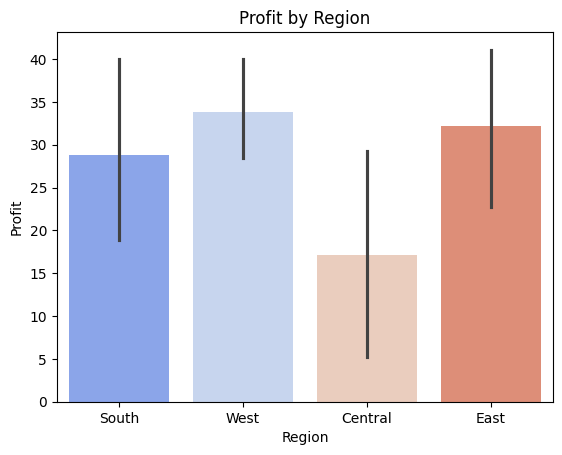

In [54]:
sns.barplot(
    x='Region',
    y='Profit',
    data=data,
    palette='coolwarm'
)

plt.title('Profit by Region')
plt.show()

The West region generates the highest profit, while the Central region generates the lowest profit.

Add a new column: "Profit Margin" by calculate Profit / Sales.

In [55]:
data["Profit Margin"] = data["Profit"] / data["Sales"]

In [56]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Days', 'Profit Margin'],
      dtype='object')

In [57]:
#Group by Region and Profit Margin
region_profit_margin = data.groupby("Region")["Profit Margin"].mean().sort_values(ascending=False)

In [58]:
region_profit_margin

,Profit Margin
Region,
West,0.219487
East,0.167301
South,0.163519
Central,-0.104073


/tmp/ipython-input-2328995730.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


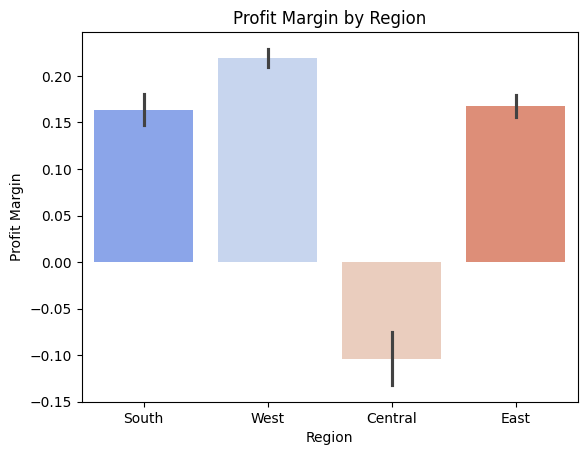

In [59]:
sns.barplot(
    x='Region',
    y='Profit Margin',
    data=data,
    palette='coolwarm'
)

plt.title('Profit Margin by Region')
plt.show()

The West region has the highest profit margin. Now let’s see which cities in the West have the highest margins.

In [60]:
#Filter the region = West
west_data = data[data["Region"] == "West"]

In [61]:
#Group by West Region and calculate average profit margin
west_profit_margin = west_data.groupby("City")["Profit Margin"].mean().sort_values(ascending=False)

In [62]:
west_profit_margin.head(10)

,Profit Margin
City,
Antioch,0.480000
Davis,0.480000
Bozeman,0.475000
San Mateo,0.470000
Layton,0.470000
Las Cruces,0.436667
San Clemente,0.431250
Pico Rivera,0.430000
Salt Lake City,0.424687


Within the West Region, Antioch and Davis has the highest profit margin, which is 48%.

### Product and Category

In [63]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [64]:
#Group by Category and Sales
category_sales = data.groupby("Category")["Sales"].sum().sort_values(ascending=False)

In [65]:
category_sales

,Sales
Category,
Technology,836154.0330
Furniture,741718.4233
Office Supplies,719047.0320


Among all categories, Technology is the best-selling category, while Office Supplies has the lowest sales.

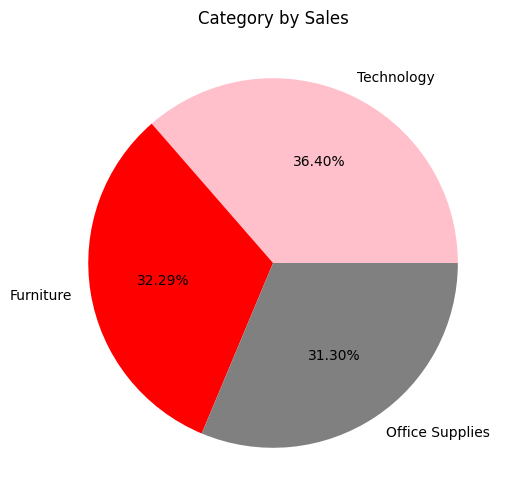

In [66]:
plt.figure(figsize=(10,6))

plt.pie(x = category_sales,
        labels = ('Technology', 'Furniture', 'Office Supplies'),
        autopct='%.2f%%', colors = ['#FFC0CB','#FF0000','#808080']
)
plt.title("Category by Sales")
plt.show()

In [67]:
#Group by Category and Profit
category_profit = data.groupby("Category")["Profit"].sum().sort_values(ascending=False)

In [68]:
category_profit

,Profit
Category,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18463.3316


The Technology category has the highest sales and also generates the highest profit compared to the other categories.

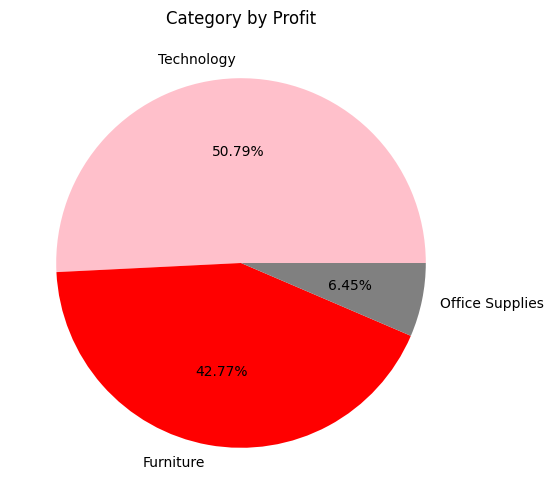

In [69]:
plt.figure(figsize=(10,6))

plt.pie(x = category_profit,
        labels = ('Technology', 'Furniture', 'Office Supplies'),
        autopct='%.2f%%', colors = ['#FFC0CB','#FF0000','#808080']
)
plt.title("Category by Profit")
plt.show()

In [70]:
#Group by Sub-Category and Profit
sub_category_profit = data.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False)

In [71]:
sub_category_profit

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26602.2251
Storage,21278.8264
Appliances,18138.0054
Furnishings,13059.1436


Among all sub-categories, Copiers are the most profitable, while Tables are the least profitable.

In [72]:
#Show top 10 sub-category that most profitable
sub_category_profit1 = data.groupby("Sub-Category")["Profit"].sum().nlargest(10).reset_index()

/tmp/ipython-input-170728730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profit", y="Sub-Category",


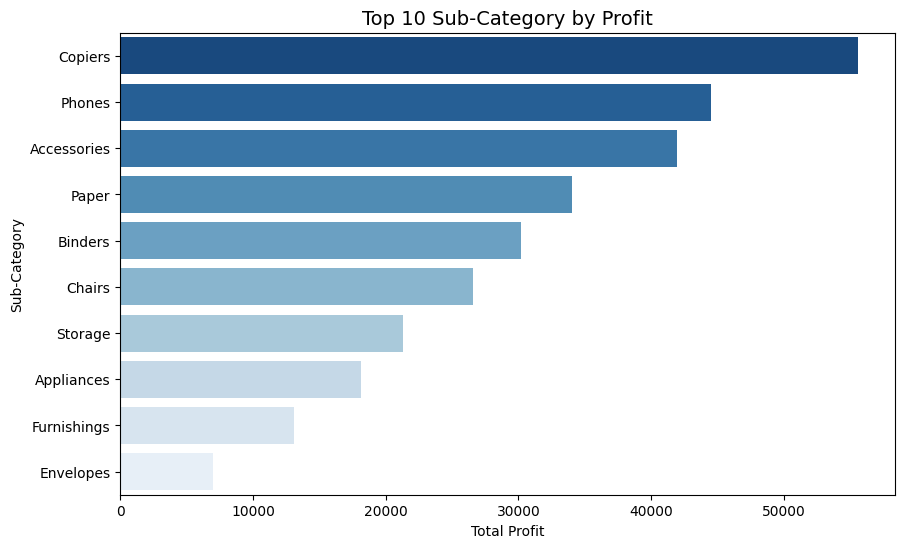

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(x="Profit", y="Sub-Category",
            data=sub_category_profit1, palette="Blues_r")

plt.title("Top 10 Sub-Category by Profit", fontsize=14)
plt.xlabel("Total Profit")
plt.ylabel("Sub-Category")
plt.show()

In [74]:
#Find product that has the highest discount applied but lowest profit
product1 = data.loc[data.sort_values(["Discount", "Profit"], ascending=[False, True]).index[0]]

In [75]:
product1

,9774
Order ID,CA-2014-169019
Order Date,2014-07-26 00:00:00
Ship Date,2014-07-30 00:00:00
Ship Mode,Standard Class
Customer ID,LF-17185
Customer Name,Luke Foster
Segment,Consumer
City,San Antonio
State,Texas
Region,Central


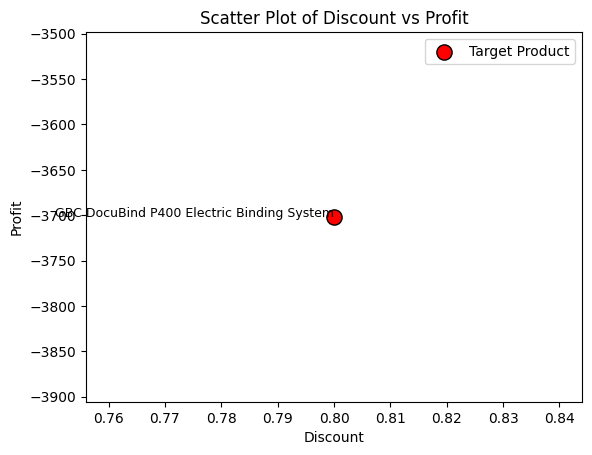

In [76]:
#Annotate that product
plt.scatter(product1["Discount"], product1["Profit"],
            color="red", s=120, edgecolor="black",
            label="Target Product")

plt.text(product1["Discount"], product1["Profit"],
         product1["Product Name"], fontsize=9, ha="right")

plt.title("Scatter Plot of Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.legend()
plt.show()

In [77]:
print("Product with highest discount but lowest profit:")
print(product1[["Product Name","Discount","Profit"]])

Product with highest discount but lowest profit:
Product Name    GBC DocuBind P400 Electric Binding System
Discount                                              0.8
Profit                                         -3701.8928
Name: 9774, dtype: object


### Financial Metrics

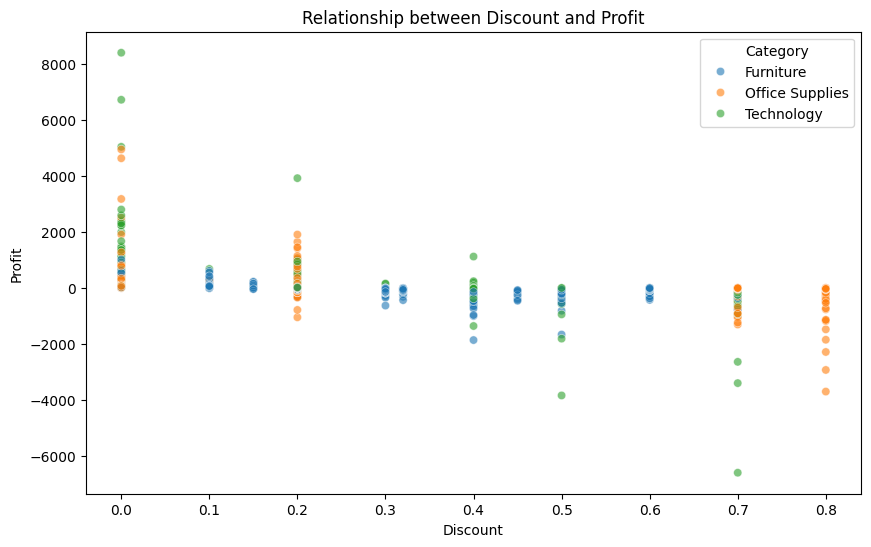

In [78]:
#Relationship Discount vs Profit
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x="Discount", y="Profit",
                hue="Category", alpha=0.6)
plt.title("Relationship between Discount and Profit")
plt.show()

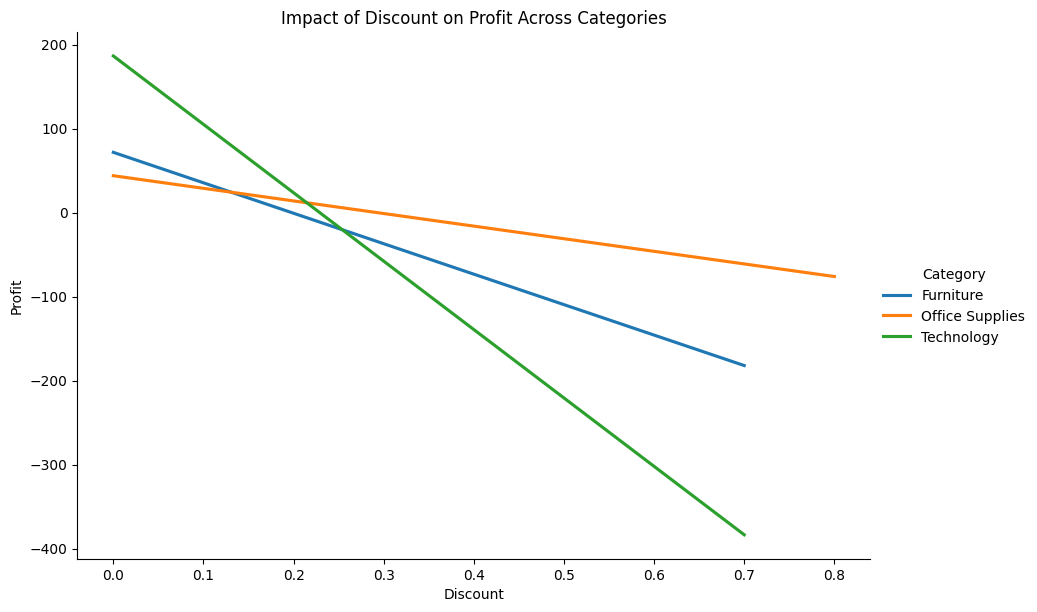

In [79]:
#Add regression trendlines for each category
sns.lmplot(data=data, x="Discount", y="Profit", hue="Category",
           scatter=False, height=6, aspect=1.5, ci=None)

plt.title("Impact of Discount on Profit Across Categories")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

Impact of Discount on Profit Across Categories:

* Technology shows the steepest decline — profit quickly turns negative as discount increases. By around 20–30% discount, Technology products are already operating at a loss, and the losses grow sharply with higher discounts.

* Furniture also experiences declining profit as discounts increase, though the slope is less steep compared to Technology. Still, beyond ~20% discount, profits become negative.

* Office Supplies are the most resilient. Profit declines gradually with increasing discount, and the loss is much smaller compared to Furniture and Technology.

Overall, discounts consistently reduce profitability, but the extent of the impact differs significantly by category.

In [80]:
#Show the order that has lowest profit
data.loc[data["Profit"] == data["Profit"].min()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Days,Profit Margin
7772,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,Lancaster,Ohio,East,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.978,7,-1.466667


Negative profit happens when high discounts cut into sales revenue beyond the product’s profit margin, and the losses become even larger when the items are sold in high quantities, causing losses to multiply or belong to low-margin categories such as Technology.

In [81]:
#Group by Category and Profit Margin
category_profit_margin = data.groupby("Category")["Profit Margin"].mean().sort_values(ascending=False)

In [82]:
category_profit_margin

,Profit Margin
Category,
Technology,0.156138
Office Supplies,0.138030
Furniture,0.038822


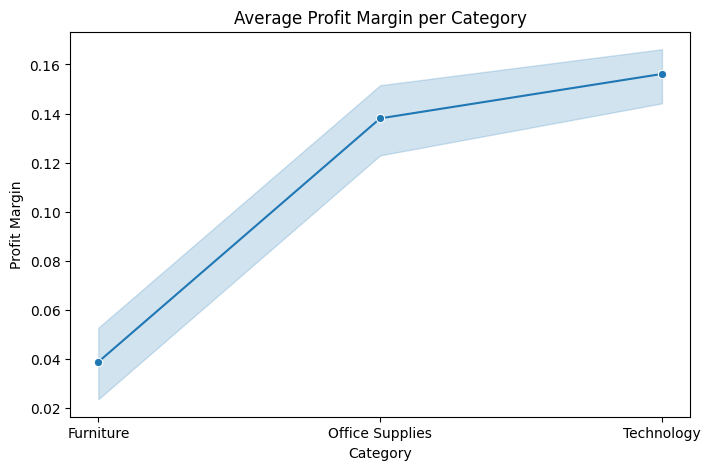

In [83]:
#Line chart Profit Margin by Category

plt.figure(figsize=(8,5))
sns.lineplot(data=data, x="Category",
             y="Profit Margin", marker="o")

plt.title("Average Profit Margin per Category")
plt.xlabel("Category")
plt.ylabel("Profit Margin")
plt.show()